In [1]:
import keras
from keras.preprocessing.text import Tokenizer
from tflearn.data_utils import to_categorical, pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Conv1D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from __future__ import print_function
X=pd.read_csv("C:/Users/DEEPANSH/Desktop/Tweets1.csv")
x=X.Tweets
y=X.Labels
raw=x.tolist()
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words


Using TensorFlow backend.


curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [4]:

sentences=[]
for raw_sentence in raw:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))
import gensim.models.word2vec as w2v
model = w2v.Word2Vec(sentences, size=100, window=5, min_count=1, workers=4)
#model.wv.most_similar(positive=['traffic', 'need'], negative=['free'])
model.save('model.bin')
# load model
#new_model = w2v.load('model.bin')
print(model)

D:\anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Word2Vec(vocab=4253, size=100, alpha=0.025)


In [5]:
from numpy import zeros
embedding_matrix = zeros((4253, 100))
i=0
for word in dic.keys():
    #print(word)
    embedding_vector = model[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
embedding_matrix

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-6.35114918e-03, -1.75915018e-03,  1.37782590e-02, ...,
         1.15339002e-02, -3.46404710e-03, -1.18380340e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [7]:
import matplotlib.pyplot as plt
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(history.history.keys())
# summarize history for accuracy


Train on 904 samples, validate on 302 samples
Epoch 1/50
 - 4s - loss: 0.6928 - acc: 0.5100 - val_loss: 0.6896 - val_acc: 0.7086
Epoch 2/50
 - 3s - loss: 0.6836 - acc: 0.7423 - val_loss: 0.6649 - val_acc: 0.7384
Epoch 3/50
 - 3s - loss: 0.6321 - acc: 0.7611 - val_loss: 0.5715 - val_acc: 0.7748
Epoch 4/50
 - 3s - loss: 0.4954 - acc: 0.8341 - val_loss: 0.4295 - val_acc: 0.7947
Epoch 5/50
 - 3s - loss: 0.3215 - acc: 0.8894 - val_loss: 0.4048 - val_acc: 0.8278
Epoch 6/50
 - 3s - loss: 0.2597 - acc: 0.9226 - val_loss: 0.4089 - val_acc: 0.8079
Epoch 7/50
 - 3s - loss: 0.2904 - acc: 0.8993 - val_loss: 0.4468 - val_acc: 0.7649
Epoch 8/50
 - 3s - loss: 0.1829 - acc: 0.9403 - val_loss: 0.3882 - val_acc: 0.8477
Epoch 9/50
 - 3s - loss: 0.1122 - acc: 0.9602 - val_loss: 0.3848 - val_acc: 0.8344
Epoch 10/50
 - 3s - loss: 0.0745 - acc: 0.9768 - val_loss: 0.4193 - val_acc: 0.8344
Epoch 11/50
 - 3s - loss: 0.0526 - acc: 0.9823 - val_loss: 0.4613 - val_acc: 0.8311
Epoch 12/50
 - 3s - loss: 0.0660 - acc:

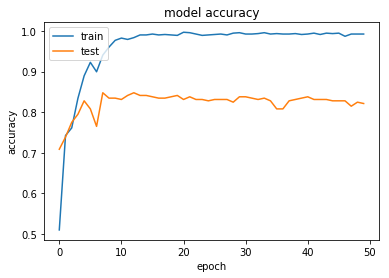

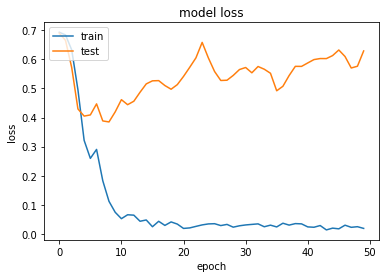

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [2]:
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
t = str.maketrans('', '', string.punctuation)
porter = PorterStemmer()
def clean_str(string):
    w = nltk.word_tokenize(string)
    w = [p.lower() for p in w]
    s = [p.translate(t) for p in w]
    w = [word for word in s if word.isalpha()]
    w = [p for p in w if not p in stop_words]
    w = [porter.stem(word) for word in w]
    string = " ".join(w)
    return string.strip().lower()
raw=[clean_str(sent) for sent in raw]

In [6]:
i=0;
final=[]
dic={'address':0}
for dil in raw:
    l=[]
    w=sentence_to_wordlist(dil)
    for wo in w:
        if wo in dic.keys():
            l.append(dic.get(wo))
        else:
            i=i+1
            dic[wo]=i
            l.append(dic.get(wo))
    final.append(l)
final
Y=y
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final, Y ,random_state=1)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
# load the dataset but only keep the top n words, zero the rest
from keras.preprocessing import sequence
top_words = i+1
# pad dataset to a maximum review length in words
max_words = 150
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
model = Sequential()
model.add(Embedding(top_words, 100, input_length=max_words,weights=[embedding_matrix]))
model.add(LSTM(128,dropout=0.8))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

904
302
904
302
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 100)          425300    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 559,189
Trainable params: 559,189
Non-trainable params: 0
_________________________________________________________________
None
